In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import pandas as pd
import numpy as np
import matplotlib
import threading
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
matplotlib.rcParams['savefig.dpi'] = 200
sys.setrecursionlimit(3000)
import pickle
from sklearn import preprocessing
import time
import inspect
sns.set_context('talk')

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from plotting_scripts import label_point, pca_rpkm_mat, get_diff_volcano

In [2]:
workingDirectory = '/home/h1bennet/liverStrains/results/181018_lxr_chip_motif_analysis/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

# Motif Analysis Showed that IRF3 motif appears to co-occur with a substantial number of LXR peaks

What is the epigenetic profile at these locations?

### H3K27Ac Signal near LXR peaks with IRF3 Motif

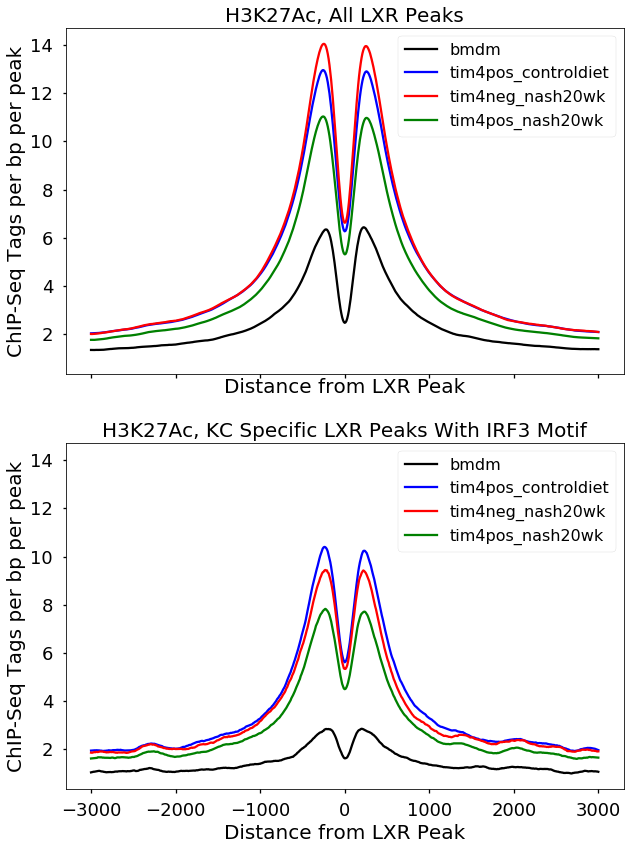

In [3]:
# hist near all kc peaks
hist = pd.read_csv('./lxr_peaks_h3k27ac_tags_hist.txt', sep='\t')
fig, ax = plt.subplots(2, 1, figsize=(10,14), sharey=True, sharex=True)
ax[0].plot(hist.iloc[:, 0],
       hist.iloc[:, 1],
       c='k',
       label='bmdm')
ax[0].plot(hist.iloc[:, 0],
       hist.iloc[:, 7],
       c='b',
       label='tim4pos_controldiet')
ax[0].plot(hist.iloc[:, 0],
       hist.iloc[:, 4],
       c='r',
       label='tim4neg_nash20wk')
ax[0].plot(hist.iloc[:, 0],
       hist.iloc[:, 10],
       c='green',
       label='tim4pos_nash20wk')
ax[0].legend(fontsize=16);
ax[0].set_title('H3K27Ac, All LXR Peaks', fontsize=20);
ax[0].set_ylabel('ChIP-Seq Tags per bp per peak', fontsize=20);
ax[0].set_xlabel('Distance from LXR Peak', fontsize=20);
ax[0].tick_params(axis='both', labelsize=18)

# plot near kc specific lxr peaks
hist = pd.read_csv('./bmdm_lxr_sc_peaks_analysis/irf3_motif_kc_unique_lxr_peak_overlap_h3k27ac_hist.txt', sep='\t')
ax[1].plot(hist.iloc[:, 0],
       hist.iloc[:, 1],
       c='k',
       label='bmdm')
ax[1].plot(hist.iloc[:, 0],
       hist.iloc[:, 7],
       c='b',
       label='tim4pos_controldiet')
ax[1].plot(hist.iloc[:, 0],
       hist.iloc[:, 4],
       c='r',
       label='tim4neg_nash20wk')
ax[1].plot(hist.iloc[:, 0],
       hist.iloc[:, 10],
       c='green',
       label='tim4pos_nash20wk')
ax[1].legend(fontsize=16);
ax[1].set_title('H3K27Ac, KC Specific LXR Peaks With IRF3 Motif', fontsize=20);
ax[1].set_ylabel('ChIP-Seq Tags per bp per peak', fontsize=20);
ax[1].set_xlabel('Distance from LXR Peak', fontsize=20);
ax[1].tick_params(axis='both', labelsize=18)

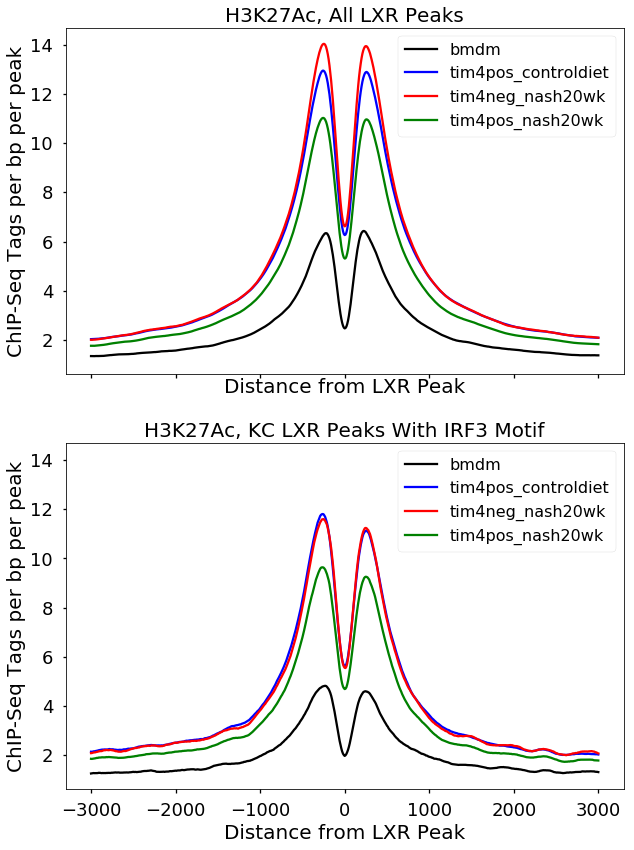

In [60]:
# hist near all kc peaks
hist = pd.read_csv('./lxr_peaks_h3k27ac_tags_hist.txt', sep='\t')
fig, ax = plt.subplots(2, 1, figsize=(10,14), sharey=True, sharex=True)
ax[0].plot(hist.iloc[:, 0],
       hist.iloc[:, 1],
       c='k',
       label='bmdm')
ax[0].plot(hist.iloc[:, 0],
       hist.iloc[:, 7],
       c='b',
       label='tim4pos_controldiet')
ax[0].plot(hist.iloc[:, 0],
       hist.iloc[:, 4],
       c='r',
       label='tim4neg_nash20wk')
ax[0].plot(hist.iloc[:, 0],
       hist.iloc[:, 10],
       c='green',
       label='tim4pos_nash20wk')
ax[0].legend(fontsize=16);
ax[0].set_title('H3K27Ac, All LXR Peaks', fontsize=20);
ax[0].set_ylabel('ChIP-Seq Tags per bp per peak', fontsize=20);
ax[0].set_xlabel('Distance from LXR Peak', fontsize=20);
ax[0].tick_params(axis='both', labelsize=18)

# plot near kc specific lxr peaks
hist = pd.read_csv('./lxr_peaks_irf3_motif_h3k27ac_tags_hist.txt', sep='\t')
ax[1].plot(hist.iloc[:, 0],
       hist.iloc[:, 1],
       c='k',
       label='bmdm')
ax[1].plot(hist.iloc[:, 0],
       hist.iloc[:, 7],
       c='b',
       label='tim4pos_controldiet')
ax[1].plot(hist.iloc[:, 0],
       hist.iloc[:, 4],
       c='r',
       label='tim4neg_nash20wk')
ax[1].plot(hist.iloc[:, 0],
       hist.iloc[:, 10],
       c='green',
       label='tim4pos_nash20wk')
ax[1].legend(fontsize=16);
ax[1].set_title('H3K27Ac, KC LXR Peaks With IRF3 Motif', fontsize=20);
ax[1].set_ylabel('ChIP-Seq Tags per bp per peak', fontsize=20);
ax[1].set_xlabel('Distance from LXR Peak', fontsize=20);
ax[1].tick_params(axis='both', labelsize=18)

IP Efficiency:
* BMDM: 32.00%
* tim4pos_nash20wk: 44.57%
* tim4pos_control_0wk: 49.65%
* tim4neg_nash20wk: 53.96%

### PU.1 Peaks 

(-1000, 1000)

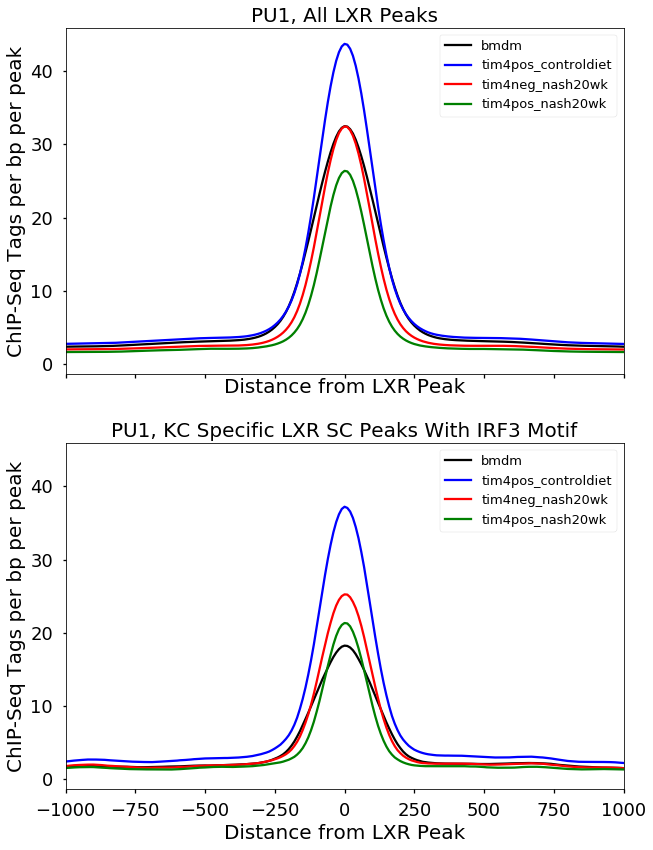

In [58]:
# plot near lxr peaks with IRF3 motif
hist = pd.read_csv('./lxr_peaks_pu1_tags_hist.txt', sep='\t')
fig, ax = plt.subplots(2, 1, figsize=(10,14), sharey=True, sharex=True)
ax[0].plot(hist.iloc[:, 0],
       hist.iloc[:, 1],
       c='k',
       label='bmdm')
ax[0].plot(hist.iloc[:, 0],
       hist.iloc[:, 7],
       c='b',
       label='tim4pos_controldiet')
ax[0].plot(hist.iloc[:, 0],
       hist.iloc[:, 4],
       c='r',
       label='tim4neg_nash20wk')
ax[0].plot(hist.iloc[:, 0],
       hist.iloc[:, 10],
       c='green',
       label='tim4pos_nash20wk')
ax[0].legend();
ax[0].set_title('PU1, All LXR Peaks', fontsize=20);
ax[0].set_ylabel('ChIP-Seq Tags per bp per peak', fontsize=20);
ax[0].set_xlabel('Distance from LXR Peak', fontsize=20);
ax[0].tick_params(axis='both', labelsize=18)

# plot near all lxr peaks
hist = pd.read_csv('./bmdm_lxr_sc_peaks_analysis/irf3_motif_kc_unique_lxr_peak_overlap_pu1_hist.txt', sep='\t')
ax[1].plot(hist.iloc[:, 0],
       hist.iloc[:, 1],
       c='k',
       label='bmdm')
ax[1].plot(hist.iloc[:, 0],
       hist.iloc[:, 7],
       c='b',
       label='tim4pos_controldiet')
ax[1].plot(hist.iloc[:, 0],
       hist.iloc[:, 4],
       c='r',
       label='tim4neg_nash20wk')
ax[1].plot(hist.iloc[:, 0],
       hist.iloc[:, 10],
       c='green',
       label='tim4pos_nash20wk')
ax[1].legend();
ax[1].set_title('PU1, KC Specific LXR SC Peaks With IRF3 Motif', fontsize=20);
ax[1].set_ylabel('ChIP-Seq Tags per bp per peak', fontsize=20);
ax[1].set_xlabel('Distance from LXR Peak', fontsize=20);
ax[1].tick_params(axis='both', labelsize=18)
ax[1].set_xlim([-1000, 1000])

(-1000, 1000)

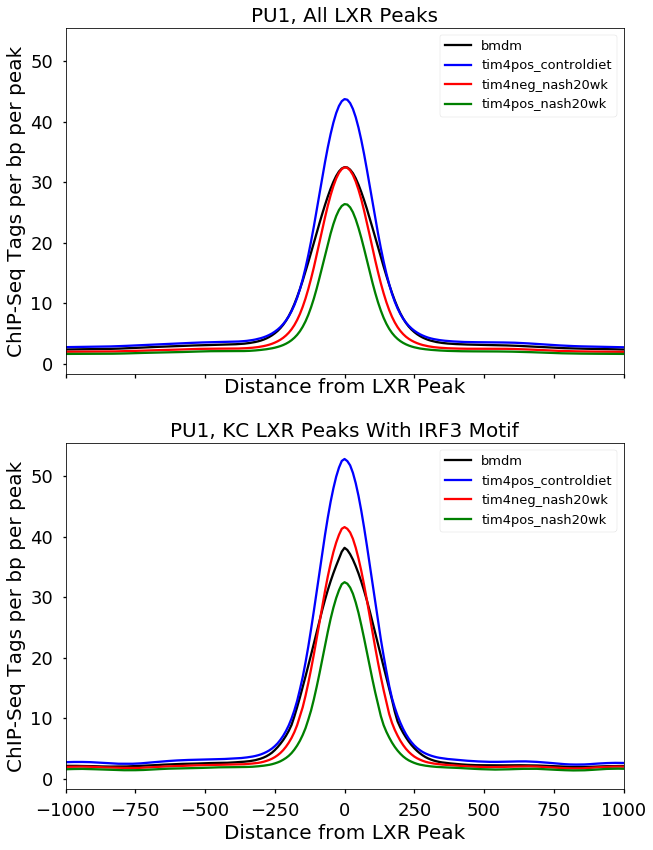

In [54]:
# plot near lxr peaks with IRF3 motif
hist = pd.read_csv('./lxr_peaks_pu1_tags_hist.txt', sep='\t')
fig, ax = plt.subplots(2, 1, figsize=(10,14), sharey=True, sharex=True)
ax[0].plot(hist.iloc[:, 0],
       hist.iloc[:, 1],
       c='k',
       label='bmdm')
ax[0].plot(hist.iloc[:, 0],
       hist.iloc[:, 7],
       c='b',
       label='tim4pos_controldiet')
ax[0].plot(hist.iloc[:, 0],
       hist.iloc[:, 4],
       c='r',
       label='tim4neg_nash20wk')
ax[0].plot(hist.iloc[:, 0],
       hist.iloc[:, 10],
       c='green',
       label='tim4pos_nash20wk')
ax[0].legend();
ax[0].set_title('PU1, All LXR Peaks', fontsize=20);
ax[0].set_ylabel('ChIP-Seq Tags per bp per peak', fontsize=20);
ax[0].set_xlabel('Distance from LXR Peak', fontsize=20);
ax[0].tick_params(axis='both', labelsize=18)

# plot near all lxr peaks
hist = pd.read_csv('./lxr_peaks_irf3_motif_pu1_tags_hist.txt', sep='\t')
ax[1].plot(hist.iloc[:, 0],
       hist.iloc[:, 1],
       c='k',
       label='bmdm')
ax[1].plot(hist.iloc[:, 0],
       hist.iloc[:, 7],
       c='b',
       label='tim4pos_controldiet')
ax[1].plot(hist.iloc[:, 0],
       hist.iloc[:, 4],
       c='r',
       label='tim4neg_nash20wk')
ax[1].plot(hist.iloc[:, 0],
       hist.iloc[:, 10],
       c='green',
       label='tim4pos_nash20wk')
ax[1].legend();
ax[1].set_title('PU1, KC LXR Peaks With IRF3 Motif', fontsize=20);
ax[1].set_ylabel('ChIP-Seq Tags per bp per peak', fontsize=20);
ax[1].set_xlabel('Distance from LXR Peak', fontsize=20);
ax[1].tick_params(axis='both', labelsize=18)
ax[1].set_xlim([-1000, 1000])

PU.1 IP Efficiencies:
* BMDM: 43.53%
* tim4neg_nash_20wk: 30.17%
* tim4pos_controldiet: 37.54%
* tim4pos_nash_20wk: 22.25%

(-1000, 1000)

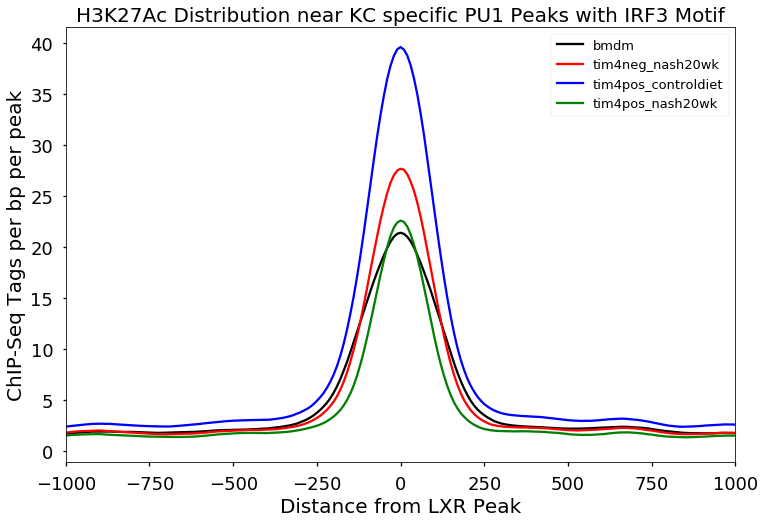

In [10]:
fig, ax = plt.subplots(figsize=(12,8))

hist = pd.read_csv('./lxr_kc_peaks_irf3_motif_subtract_pu1_tags_hist.txt', sep='\t')
ax.plot(hist.iloc[:, 0],
       hist.iloc[:, 1],
       c='k',
       label='bmdm')
ax.plot(hist.iloc[:, 0],
       hist.iloc[:, 4],
       c='r',
       label='tim4neg_nash20wk')
ax.plot(hist.iloc[:, 0],
       hist.iloc[:, 7],
       c='b',
       label='tim4pos_controldiet')
ax.plot(hist.iloc[:, 0],
       hist.iloc[:, 10],
       c='green',
       label='tim4pos_nash20wk')
ax.legend();
ax.set_title('H3K27Ac Distribution near KC specific PU1 Peaks with IRF3 Motif', fontsize=20);
ax.set_ylabel('ChIP-Seq Tags per bp per peak', fontsize=20);
ax.set_xlabel('Distance from LXR Peak', fontsize=20);
ax.tick_params(axis='both', labelsize=18)
ax.set_xlim([-1000, 1000])

### Pull expression of genes with IRF3 in the promoter

In [3]:
irf3_lxr_kc = pd.read_csv('./bmdm_lxr_sc_peaks_analysis/irf3_motif_kc_unique_lxr_peak_overlap_anno.txt', sep='\t')

In [17]:
irf3_lxr_kc_promoters = irf3_lxr_kc.loc[irf3_lxr_kc.Annotation.str.contains('TSS'), 'Gene Name']

In [7]:
# read in rpkm_timecourse
rpkm_timecourse = pd.read_csv('/home/h1bennet/kupffer_timecourse_tba/results/180830_atac/expression/rna_exp_rpkm.tsv', sep='\t')
rpkm_timecourse.set_index(rpkm_timecourse.columns.values[0], inplace=True)
rpkm_timecourse.index.rename('refseqID', inplace=True)
# set rpkm_timecourse index
mm10_gene = rpkm_timecourse['Annotation/Divergence'].str.split('|').str[0]

# clean up column names
# rename rpkm_timecourse columns
rpkm_timecourse = rpkm_timecourse.rename(columns=dict(zip(rpkm_timecourse.iloc[:, 7:].columns.values,
                                    pd.Series(rpkm_timecourse.iloc[:, 7:].columns.values).str[:-5].str.split('/').str[-1])))
# change index to gene names
rpkm_timecourse['gene'] = mm10_gene.str.upper()
rpkm_timecourse = rpkm_timecourse.reset_index().set_index('gene').drop(labels='refseqID', axis=1)

# filter genes with length < 250 bp
rpkm_timecourse = rpkm_timecourse.loc[rpkm_timecourse.Length >= 250, :]
rpkm_timecourse = rpkm_timecourse.iloc[:, 7:]
rpkm_timecourse = rpkm_timecourse.iloc[:, [1,2,3,7,8,11,10,5,6,12,13]]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Text xticklabel objects>)

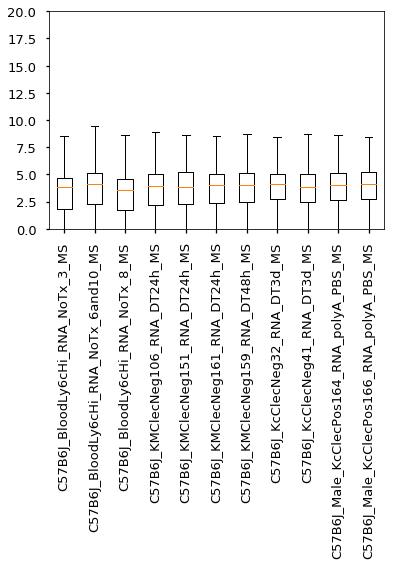

In [39]:

plt.boxplot(labels=rpkm_timecourse.columns.tolist(),
            x=np.log2(rpkm_timecourse.reindex(irf3_lxr_kc_promoters.str.upper()).dropna() + 1).T);
plt.ylim([0, 20])
plt.xticks(rotation=90)

In [41]:
# read in rpkm
rpkm = pd.read_csv('../181009_kupffer_ly6c_tba/expression/rna_exp_rpkm.tsv', sep='\t')
rpkm.set_index(rpkm.columns.values[0], inplace=True)
rpkm.index.rename('refseqID', inplace=True)
# set rpkm index
mm10_gene = rpkm['Annotation/Divergence'].str.split('|').str[0]

# clean up column names
# rename rpkm columns
rpkm = rpkm.rename(columns=dict(zip(rpkm.iloc[:, 7:].columns.values,
                                    pd.Series(rpkm.iloc[:, 7:].columns.values).str[:-5].str.split('/').str[-1])))
# change index to gene names
rpkm['gene'] = mm10_gene
rpkm = rpkm.reset_index().set_index('gene').drop(labels='refseqID', axis=1)

# filter genes with length < 250 bp
rpkm = rpkm.loc[rpkm.Length >= 250, :]

# drop pooled sample
rpkm = rpkm.drop(columns=['C57B6J_BloodLy6cHi_RNA_NoTx_Pooled_MS_l20171111_CGATGT']) # ,
#                           'C57Bl6_BloodLy6cHi_RNA_20wkControlDiet_JSSTDT_Rep1_JSS_s20180814_CGATGT',
#                           'C57Bl6_BloodLy6cHi_RNA_20wkControlDiet_JSSTDT_Rep2_JSS_s20180814_TGACCA'])

# filter genes expressed under 4 rpkm in all samples 
rpkm_filt = rpkm.loc[(rpkm.iloc[:, 7:] > 4).all(1), :]

[Text(0,0,'C57B6J_BloodLy6cHi_RNA_NoTx_3_MS_l20171111_TGACCA'),
 Text(0,0,'C57B6J_BloodLy6cHi_RNA_NoTx_6and10_MS_l20171111_ACAGTG'),
 Text(0,0,'C57B6J_BloodLy6cHi_RNA_NoTx_8_MS_l20171111_ACTTGA'),
 Text(0,0,'C57B6J_BMDM_RNA_GW3965_1uM_C573A_CMB_l20180625_CACCGG'),
 Text(0,0,'C57B6J_BMDM_RNA_GW3965_1uM_C573B_CMB_l20180625_TCGAAG'),
 Text(0,0,'C57Bl6_BloodLy6cHi_RNA_20wkControlDiet_JSSTDT_Rep1_JSS_s20180814_CGATGT'),
 Text(0,0,'C57Bl6_BloodLy6cHi_RNA_20wkControlDiet_JSSTDT_Rep2_JSS_s20180814_TGACCA'),
 Text(0,0,'C57Bl6_BloodLy6cHi_RNA_20wkNASHDiet_JSSTDT_Rep1_JSS_s20180814_ACAGTG'),
 Text(0,0,'C57Bl6_BloodLy6cHi_RNA_20wkNASHDiet_JSSTDT_Rep2_JSS_s20180814_CAGATC'),
 Text(0,0,'C57Bl6_BloodLy6cLow_RNA_20wkNASHDiet_JSSTDT_Rep1_JSS_s20180814_GAGTGG'),
 Text(0,0,'C57Bl6_BloodLy6cLow_RNA_20wkNASHDiet_JSSTDT_Rep2_JSS_s20180814_GGTAGC'),
 Text(0,0,'C57Bl6_KupfferTim4Pos_RNA_Control_0wk_LN36cM'),
 Text(0,0,'C57Bl6_KupfferTim4Pos_RNA_Control_0wk_LN38aM'),
 Text(0,0,'NCoRWT_Ly6cHi_RNA_AMLNDiet_20wee

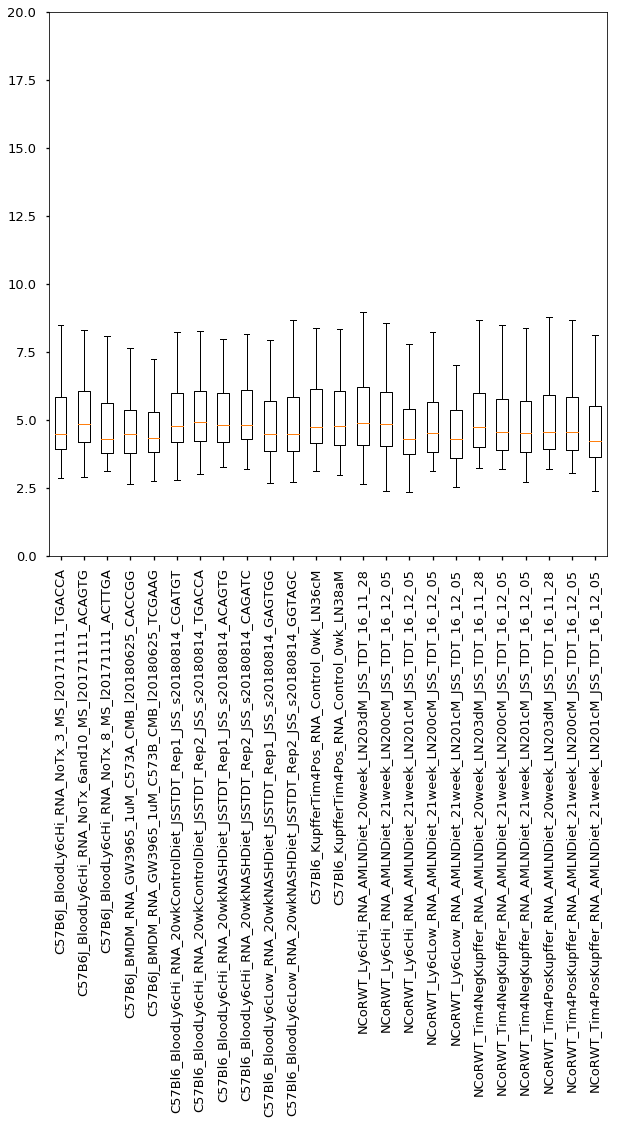

In [51]:
fig, ax = plt.subplots(figsize=(10,10))
rpkm_mat = rpkm_filt.iloc[:, 7:]
ax.boxplot(labels=rpkm_mat.columns.tolist(),
            x=np.log2(rpkm_mat.reindex(irf3_lxr_kc_promoters).dropna() + 1).T);
ax.set_ylim([0, 20])
ax.set_xticklabels(rpkm_mat.columns.tolist(), rotation=90)

In [8]:
a

In [9]:
lxr

,0,1,2,3,4,5
0,chr10,100834905,100835072,chr10-1,1,+
1,chr1,88224139,88224306,chr1-1,1,+
2,chr2,167925107,167925274,chr2-4,1,+
3,chr19,44314480,44314647,chr19-2,1,+
4,chr11,60210504,60210671,chr11-3,1,+
5,chr11,60210504,60210671,chr11-3,1,+
6,chr4,130800654,130800821,chr4-3,1,+
7,chr2,131210332,131210499,chr2-7,1,+
8,chr7,25776790,25776957,chr7-2,1,+
9,chr4,141538834,141539001,chr4-9,1,+
